# __Supervised Learning: Regression Model Evaluation and Validation__

## __Performance Metrics__

Evaluation metrics help in regression analysis as they provide quantitative measures of model performance, aiding in the assessment and selection of regression models. In regression analysis, several evaluation metrics are commonly used to assess the performance of a regression model. Some of the key evaluation metrics include:

#### __Mean Squared Error (MSE)__

It calculates the average of the squares of the errors, which are the differences between the actual and predicted values. A lower MSE indicates better model performance.

#### __Root Mean Squared Error (RMSE)__

RMSE is the square root of the MSE, providing a measure of the average magnitude of the errors in the predicted values. Since the square root reverses the squaring operation of MSE, RMSE ends up having the same units as the original dependent variable, making it easier to interpret than MSE

#### __Mean Absolute Error (MAE):__

MAE calculates the average of the absolute errors between the actual and predicted values. It's less sensitive to outliers compared to MSE and RMSE.

#### __R-squared (R2):__

R-squared explains how much of the variation in the dependent variable(y) can be attributed to the changes in the independent variable(x). R-squared values range from 0 to 1.

* **0**: This indicates that the model explains none of the variance in the dependent variable. The independent variables have no explanatory power for the changes in y.
* **1**: This represents a perfect fit. The model explains all of the variance in the dependent variable. The changes in y are perfectly captured by the changes in X.

While a higher R-squared generally suggests a better model fit, it's not the only factor to consider. A very high R-squared might be achieved by a model that's simply overfitting the data

### Now, let's build a linear regression model, perform analysis on it, and evaluate the model's performance:

#### __Step 1: Set up and Data Loading__

- Import the necessary libraries: numpy, pandas, matplotlib.pyplot from sklearn.datasets.
- Load the housing dataset.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#### __Step 2: Initial Data Exploration__

- Explore the first few rows, generate statistical summaries, and check for missing values using __.head()__, __.describe()__, and __.isna().sum()__.

In [3]:
# Load the dataset
housing_data = pd.read_csv('housing_with_ocean_proximity.csv')

In [4]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Display summary statistics for the DataFrame 'housing_df'
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### __Observations:__

- The house price lies mostly in the price bracket between 1.1 million and 2.6 million.
-  Most houses are 18 to 37 years old.

In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

##### __Observations:__

- Here `total_bedrooms` has null values which we have to remove.
- It can be seen that `total_bedroom` is the only feature with **207** null values.
- Since the null values makes up for only 1% of the total data, rows of the column/feature with missing values  will be removed.
- `ocean_proximity` is a categorial variable for which we need to create dummy variables.

In [16]:
# Remove all the rows with null values:

housing_data = housing_data.dropna()

In [18]:
# Recheck for missing values in the DataFrame 'housing_df'

housing_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Let's create dummy variables for `ocean_proximity`

- `housing_data`: This is the DataFrame containing your housing data.

- `pd.get_dummies`: This is the pandas function that performs the one-hot encoding. It converts categorical variables into a series of binary variables (0 or 1). Each category in the original variable is represented by a separate column.


- `drop_first=True`: This parameter drops the first category for each variable. This is done to avoid the dummy variable trap, which is a situation where the dummy variables are highly collinear, causing issues in statistical models. By dropping the first category, you can reduce multicollinearity.

- `dtype='int'`: This ensures that the resulting dummy variables are of integer type (0 or 1), which can save memory compared to the default float type.

- `prefix='op'`: This parameter adds a prefix to the new dummy variable columns. Here, the prefix 'op' will be added to the beginning of each new column name created by the one-hot encoding process.

In [21]:
housing_data = pd.get_dummies(housing_data, drop_first=True, dtype='int', prefix='op')
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0


In [23]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   op_INLAND           20433 non-null  int64  
 10  op_ISLAND           20433 non-null  int64  
 11  op_NEAR BAY         20433 non-null  int64  
 12  op_NEAR OCEAN       20433 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 2.2 MB


#### __Step 3: Prepare the dataset__

**Steps to be followed:**

- Prepare your features (X) and target (y) for modeling.
   * The target feature, which is the feature we are trying to predict, is `median_house_value`. This is assigned to the variable y.
   * The features used to predict the target are the independent variables(X).
   * This will be a multi-regression model as there are more than one independent variable.

In [26]:
# Assign values to X and y (Vertical Split)

X = housing_data.drop(['median_house_value'], axis=1)
y = housing_data['median_house_value']

In [28]:
X[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [30]:
y[:5]

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [32]:
# Splitting the data into training and testing sets to avoid data leakage (Horizontal Split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### __Step 4: Perform K Fold validation__

**Key components**

- KFold: Implements K-fold cross-validation.
- n_splits=10: Divides the dataset into 10 folds.
- random_state=42: Ensures reproducible shuffling.
- shuffle=True: Shuffles the data before splitting.

In [35]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

#### __Step 5: Initialize the model__

In [38]:
model = LinearRegression()

##### __Evaluate the model__

- cross_val_score: Evaluates the model using cross-validation.
- model: The machine learning model to evaluate.
- X_train and y_train: Training features and target variables.
- scoring='neg_mean_absolute_error': Uses negative MAE as the performance metric.
- cv=kf: Cross-validation strategy (e.g., KFold).
- n_jobs=-1: Utilizes all available processors for parallel computation.

In [41]:
k_fold_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
k_fold_scores

array([-4.59151426e+09, -4.32910471e+09, -5.64772395e+09, -4.56925929e+09,
       -4.75022891e+09, -4.85619722e+09, -4.88204470e+09, -4.83863619e+09,
       -4.74790066e+09, -4.61131237e+09])

In [42]:
k_fold_scores.size

10

In [43]:
k_fold_scores_mae = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)
k_fold_scores_mae

array([-49134.45853302, -48011.37058892, -53452.98401417, -49632.16255052,
       -49645.67097715, -50050.91354386, -50624.31805674, -50432.08711946,
       -49771.99690336, -48613.21586018])

**Evaluating Cross-Validation Scores:**


Calculate metrics (e.g., Mean Absolute Error, Mean Squared Error) from cross-validation scores to evaluate the model's performance.

- np.abs(scores): Converts negative MAE values to positive MAE values.
- np.mean(scores): Calculates the average MAE across all 10 cross-validation folds.

In [45]:
np.mean(np.abs(k_fold_scores))

4782392227.0804825

In [46]:
np.mean(np.abs(k_fold_scores_mae))

49936.91781473876

#### __Step 6: Train the Model and Evaluate on Test Set__

**Now fit the model with train data and calculate MSE for test data.**
- Train the model using the training data `X_train` and `y_train`.
- Uses the trained model to make predictions on the test data `X_test`.
- Calculates the Mean Squared Error (MSE) between the actual test target values `y_test` and the predicted values `y_test_pred`.
- Print the calculated Test MSE.

In [48]:
# Evaluate the model on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

In [49]:
# Calculate MSE
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared score
r2_test = r2_score(y_test, y_test_pred)

# Calculate MAE
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Test MSE: {mse_test}")
print(f"Test R-squared: {r2_test}")
print(f"Test MAE: {mae_test}")

Test MSE: 4614164009.95869
Test R-squared: 0.653875373567343
Test MAE: 49642.99835159895


**Observation**
- An MSE of `4614164009.958683` is quite large, indicating that on average, the squared prediction errors are large. This can be interpreted in the context of the units of the dependent variable (`median_house_value`), which are likely in dollars.

- This can further be mitigated by Scaling the features. Feature scaling is critical in machine learning to ensure that all features contribute equally to the model’s prediction.

- An R2 score of `0.65` means that approximately `64%` of the variance in `median_house_value` is explained by the model. This suggests that while the model captures a significant portion of the variability, there is still `35%` of the variance unexplained by the model

##### __Repeat the process to demonstrate LOOCV:__

* X_train, y_train  is same across all CV implementation

In [52]:
# Perform LOOCV
loo = LeaveOneOut()

# Compute Cross-validation scores
loocv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=loo, n_jobs=-1)
loocv_scores

array([  -1683.70145042,   -4045.52563742,  -42891.32675324, ...,
       -120574.22431376,  -23077.34917914,   -2677.73695918])

In [54]:
loocv_scores.size

14303

In [59]:
20433*0.7

14303.099999999999

In [62]:
np.mean(np.abs(loocv_scores))

49931.80785901295

##### __Note: Stratified K-Fold is typically used for classification problems. For regression, standard K-Fold is preferred.__

#### __Observation for MAE and MSE:__

Mean Absolute Error and MSE is quite high. To improve the model, more complex model can be considered which will be discussed in further lessons.

## __Regularization__

__Cost vs loss function__

### __Regularization in Regression__

In linear regression, regularization encompasses a set of techniques employed to address the issue of overfitting.

Regularization techniques achieve their objective by introducing a penalty term to the model's objective function. This objective function, typically measured by mean squared error, is minimized during the training process. The penalty term discourages the model from attaining excessive complexity by penalizing the size of the model coefficients, thereby mitigating overfitting.

__Regularization term__ or `alpha`: is a hyperparameter that scales the penalty term. It controls the strength of regularization.
- Higher `alpha`: Imposes a stronger penalty on the coefficients, leading to greater regularization. This tends to produce a simpler model that may underfit the training data but often generalizes better to unseen data.
- Lower `alpha`: Imposes a weaker penalty, leading to a model that is less restricted by the regularization and more complex, potentially capturing more details in the data but at the risk of overfitting.

__Benefits of Regularization:__
- Enhanced Generalizability: By mitigating overfitting, regularization fosters models that perform well on unseen data.
- Reduced Model Complexity: It promotes interpretability and potentially reduces computational costs associated with training complex models.


__Common Regularization Techniques are:__
* Lasso Regression (L1 Regularization)
* Ridge Regression (L2 Regularization)


### __Least Absolute Shrinkage and Selection Operator (Lasso) Regression__

__Lasso Regression__ relies upon the linear regression model but additionaly performs a so called L1 regularization, which is a process of introducing additional information in order to prevent overfitting. As a consequence, we can fit a model containing all possible predictors and use lasso to perform variable selection by using a technique that regularizes the coefficient estimates (it shrinks the coefficient estimates towards zero).

- It performs variable selection or feature selection.
- It forces some of the coeﬃcient estimates to be exactly equal to zero with the help of a large tuning parameter λ.
- It helps reduce the learning of more complex data and overfitting of the model.
- It decreases the variance of the model without an increase in bias.
  
In particular, the minimization objective does not only include the residual sum of squares (RSS) - like in the OLS regression setting - but also the sum of the absolute value of coefficients.

__Residual Sum of Squares (RSS)__, which is the sum of square of difference between actual and predicted values.

$$ \text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Where:

$y_i$: represents the actual target value from the dataset

​$\hat{y}_i$: represents the predicted target values by the regression model.

𝑛: is the number of observations.


The predictions ​$\hat{y}_i$ in a regression model are typically calculated using the linear regression equation. For multiple regression involving several predictor variable, the equation is:


 $$ \hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_ n $$

- $ x_1, x_2, \ldots, x_n $ are the predictor variables,
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for each predictor.

The RSS formula for multiple linear regression can also be written as:

$$ \text{RSS} = \sum_{i=1}^n \left( y_i - \left( \beta_0 + \sum_{j=1}^p \beta_j x_{ij} \right) \right)^2 $$

Where:

- $ y_i $ represents the actual value for the \(i\)-th observation.
- $ \beta_0 \ $ is the intercept.
- $ \beta_j \ $ are the coefficients for each predictor \(j\).
- $ x_{ij} $ represents the \(j\)-th predictor variable for the \(i\)-th observation.
- $ n $ is the total number of observations.
- $ p $ is the number of predictor variables.

__In Lasso regression__, the minimization objective (also called the standard loss function (mean squared error)) becomes:

$$ \text{Loss} = \sum_{i=1}^n \left( y_i - \left( \beta_0 + \sum_{j=1}^p \beta_j x_{ij} \right) \right)^2 + \alpha \sum_{j=1}^p |\beta_j| $$

which equals:

$$ \text{Loss} = \text{RSS} + \alpha \sum_{j=1}^p |\beta_j| $$

Where $ \alpha \ $ (alpha) can take various values:
- $ \alpha = 0 \ $: Same coefficients as least squares linear regression
- $ \alpha = \infty $: All coefficients are zero
- $ 0 < \alpha < \infty $: Coefficients are between 0 and that of least squares linear regression


### Now, Let us implement lasso regression.

In [72]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

**Description of the `Hitters.csv` Dataset**

A data frame with 322 observations of major league players on the following 20 variables (see more about the dataset in this [documentation](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf)).

### __We want to predict a baseball player's salary based on various statistics associated with performance in the previous year.__ 

In [75]:
# Load the data from a CSV file into a DataFrame and display 5 rows
hitters_data = pd.read_csv('Hitters.csv')
hitters_data.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [76]:
hitters_data.columns

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [77]:
hitters_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [78]:
# Remove "Unnamed: 0" from the dataframe

hitters_data.drop('Unnamed: 0', axis=1, inplace=True)

In [79]:
hitters_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

**Observations**

- Overall, it includes 322 observations and 21 columns (1 column has been removed).
- As seen, the **Salary** field has null values.

In [81]:
print("Number of missing values in 'Salary':", len(hitters_data[hitters_data['Salary'].isnull()]))

Number of missing values in 'Salary': 59


In [82]:
# Another way to get the no. of missing values from the Series

hitters_data.isna().sum()['Salary']

59

**Observations**

- There are 59 rows out 322 observations with null values corresponding to the column `Salary`.
- Since we will use the lasso algorithm from scikit learn, we need to encode our categorical features as one-hot numeric features (dummy variables).

**Note: Lasso regression assumes that the features are numeric and continuous, and does not work well with categorical variables.**

In [84]:
# Creating dummies for all the variable of object type
dummies = pd.get_dummies(hitters_data[['League', 'Division','NewLeague']])

# Convert boolean True/False to integer 1/0
dummies = dummies.astype(int)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     322 non-null    int64
 1   League_N     322 non-null    int64
 2   Division_E   322 non-null    int64
 3   Division_W   322 non-null    int64
 4   NewLeague_A  322 non-null    int64
 5   NewLeague_N  322 non-null    int64
dtypes: int64(6)
memory usage: 15.2 KB


In [85]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,1,0,1,0,1,0
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1


In [86]:
# Create labels X and y
y = hitters_data['Salary']

# Drop the column with the outcome variable (Salary), and categorical columns for which dummy variables is already created.
X_numerical = hitters_data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# List all the numerical columns in X_numerical
list_numerical = X_numerical.columns
list_numerical

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')

In [87]:
y.head()

0      NaN
1    475.0
2    480.0
3    500.0
4     91.5
Name: Salary, dtype: float64

In [88]:
X_numerical.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0


**Next Steps:**

- Concatenate the dummy variable dataframe `dummies` and `X_numerical` to create `X`.

**Observations:**

- Creating dummy variables for `League`, `Division`, and `NewLeague` allows us to convert categorical data into a numerical format suitable for machine learning models, while avoiding multicollinearity by dropping one category. This ensures that the models can interpret and leverage these categorical distinctions effectively.

**Data Description:**
- __League (A or N):__ American League (A) or National League (N) as of the end of 1986.
- __Division (E or W):__ Eastern Division (E) or Western Division (W) as of the end of 1986.
- __NewLeague (A or N):__ American League (A) or National League (N) as of the beginning of 1987.

`League_N`: 1 if the league is National League (N), 0 otherwise.

`Division_W`: 1 if the division is Western Division (W), 0 otherwise.

`NewLeague_N`: 1 if the new league is National League (N), 0 otherwise.

In [90]:
# Create X with dummy variables and numerical variables
X = pd.concat([X_numerical, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,0,0,0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1


In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    float64
 1   Hits         322 non-null    float64
 2   HmRun        322 non-null    float64
 3   Runs         322 non-null    float64
 4   RBI          322 non-null    float64
 5   Walks        322 non-null    float64
 6   Years        322 non-null    float64
 7   CAtBat       322 non-null    float64
 8   CHits        322 non-null    float64
 9   CHmRun       322 non-null    float64
 10  CRuns        322 non-null    float64
 11  CRBI         322 non-null    float64
 12  CWalks       322 non-null    float64
 13  PutOuts      322 non-null    float64
 14  Assists      322 non-null    float64
 15  Errors       322 non-null    float64
 16  League_N     322 non-null    int64  
 17  Division_W   322 non-null    int64  
 18  NewLeague_N  322 non-null    int64  
dtypes: float

In [92]:
# Split the dataset into training and testing sets before handling missing values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Observations:**

- Lasso performs best when all numerical features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

- This means it is important to standardize our features. We do this by subtracting the mean from our observations and then dividing the difference by the standard deviation.

- To avoid data leakage, the standardization of numerical features should always be performed after data splitting and only from training data.

**Standard Scaler:**

We use standardization to ensure that numerical features have a mean of 0 and a standard deviation of 1, which improves model performance, accelerates convergence, and ensures consistent feature impact in machine learning algorithms.

- __`StandardScaler()`__: Creates an instance of the StandardScaler.

- __`.fit(X_train[list_numerical])`__: Computes the mean and standard deviation for each feature in the `X_train[list_numerical]` dataset. `X_train` is your training dataset, and list_numerical is a list of column names corresponding to the numerical features (not including the categorical columns). This step calculates the parameters needed for scaling but does not yet apply the scaling.

- __`scaler.transform(X_train[list_numerical])`__: Applies the standardization to the training data. This transforms each feature in the training dataset to have a mean of 0 and a standard deviation of 1.

- __`X_train[list_numerical]`__: The transformed numerical features are assigned back to the `X_train` DataFrame, effectively replacing the original values.

- __`scaler.transform(X_test[list_numerical])`__: Applies the same standardization parameters (mean and standard deviation) computed from the training data to the test data. This ensures that the test data is scaled in the same way as the training data.

- __`X_test[list_numerical]`__: The transformed numerical features are assigned back to the `X_test` DataFrame, replacing the original values.

In [95]:
# Perform Standardization on numerical features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical])
scaler

StandardScaler()

In [96]:
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

**Observations:**

- Here we are fitting a StandardScaler to the numerical features in `X_train` to compute their mean and standard deviation, then using this scaler to standardize the same numerical columns in both `X_train` and `X_test`, ensuring they have a mean of 0 and a standard deviation of 1. After standardizing, we replace the original values in `X_train` and `X_test` with the new standardized data.

In [98]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
168,-0.397522,-0.564851,-0.670974,-1.052955,-0.393382,-1.060741,-0.684910,-0.924502,-0.910332,-0.729716,-0.936501,-0.847742,-0.856822,-0.210356,-0.654364,-0.777869,0,1,0
148,0.780435,0.791703,-0.437296,0.306138,-0.355490,-0.584603,0.768478,0.560523,0.571824,-0.332183,0.302385,0.145025,-0.052093,0.071044,1.831723,0.315685,0,0,0
221,1.291745,1.459214,-0.320458,1.509906,0.061319,0.891425,-0.684910,-0.763020,-0.718487,-0.577718,-0.653843,-0.733311,-0.664141,0.147789,-0.676829,0.003241,1,0,1
227,1.265856,1.136225,0.847928,2.131206,0.061319,1.272336,-1.100164,-0.695302,-0.692186,-0.378952,-0.545591,-0.708569,-0.581023,0.147789,-0.669341,-0.777869,0,1,0
139,0.398569,0.081127,-1.021489,0.577957,-0.582840,1.558019,-1.100164,-0.928843,-0.918067,-0.776484,-0.849298,-0.891040,-0.694365,-0.031284,-0.714270,0.159463,0,1,1


**Next Steps:**

- Filling in the missing value by taking the median of elements in `y_train`.
- `y` is a series with values from the target variable `Salary`, and not a dataframe, hence directly computing the median.
  
According to standard machine learning practices, filling missing values in the test set with statistics (like median) calculated from the training set does not constitute Data leakage. This method ensures that no information from the test set influences the training process, thus maintaining the integrity of the evaluation.

In [100]:
# Imputing the values NA values in the series with the median

median_salary = y_train.median(skipna = True)
y_train = y_train.fillna(median_salary)
y_train.head()

168    110.0
148    850.0
221    210.0
227    200.0
139    100.0
Name: Salary, dtype: float64

In [101]:
y_test = y_test.fillna(median_salary)
y_test.head()

173     422.5
132     325.0
197     422.5
9      1100.0
104     422.5
Name: Salary, dtype: float64

### Create a Lasso Model.

First, we apply lasso regression on the training set with regularization parameter `alpha`=1

`alpha = 1`: This value is commonly used as default and provides a good balance between maintaining model complexity and reducing overfitting.


In [103]:
# Create and fit the Lasso regression model to the training data
lasso_model = Lasso(alpha=1, max_iter=10000).fit(X_train, y_train)
print("Lasso intercept:", lasso_model.intercept_)

# Get the coefficients (weights) of the fitted Lasso regression model
print("Lasso coefficients:", lasso_model.coef_)

Lasso intercept: 552.1437963555313
Lasso coefficients: [-310.80528552  264.55074813   24.16085059    0.           -0.
   98.27501652  -71.92938903 -154.88026267  115.47642309    0.
  274.32490369  222.99944567 -217.31294449   50.42773172   41.83950725
  -22.76889619   23.87540404 -118.63107582   -0.        ]


In [104]:
coeff = np.array(lasso_model.coef_)
features = np.array(X_train.columns)

In [105]:
# Create a dataframe for the coefficients and the respective columns
df = pd.DataFrame(coeff, features)
df

,0
AtBat,-310.805286
Hits,264.550748
HmRun,24.160851
Runs,0.000000
RBI,-0.000000
Walks,98.275017
Years,-71.929389
CAtBat,-154.880263
CHits,115.476423
CHmRun,0.000000


In [106]:
# Create and fit the Lasso regression model to the training data
lasso_model = Lasso(alpha=15, max_iter=10000).fit(X_train, y_train)
print("Lasso intercept:", lasso_model.intercept_)

# Get the coefficients (weights) of the fitted Lasso regression model
print("Lasso coefficients:", lasso_model.coef_)

Lasso intercept: 541.8702193665673
Lasso coefficients: [ -0.          65.33125729   0.           0.           0.
  25.10854133  -0.           0.          28.08970003   0.
   0.         144.26890997  -0.          35.16627399  -0.
  -0.           0.         -76.0692799    0.        ]


**Observation**

* __Lasso Intercept:__ This is the intercept term of your Lasso regression model. It represents the expected mean value of the dependent variable when all independent variables are set to zero. In practical terms, it's the baseline prediction when no other information (from the variables) is provided.

* __Lasso coefficients:__ represent the relationship between each independent variable and the dependent variable.
Each coefficient estimates the change in the dependent variable for a one unit change in the respective independent variable, holding all other variables constant.
    - A positive coefficient indicates that as the independent variable increases, the dependent variable also increases.
    - A negative coefficient indicates that as the independent variable increases, the dependent variable decreases.
    - The magnitude of the coefficient shows the strength of the impact. A larger absolute value indicates a stronger effect.



* Lasso regression is known for its ability to perform feature selection by shrinking some coefficients to zero, thus effectively removing those variables from the equation.

* In this model, however, it seems that none of the coefficients are exactly zero, suggesting that all included variables have some impact on the model, though some impacts are very small (e.g., coefficients close to zero).

**Next Steps: Model Evaluation on Lasso model**

- Test the lasso model and make predictions
- Evaluate the RMSE and R2 scores for model performance.
- Optimize the model.

In [132]:
# Training data
y_train_pred = lasso_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, y_train_pred)*100,2))

MSE training set 99172.05
R squared training set 38.0


In [136]:
# Test data
y_test_pred = lasso_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, y_test_pred)*100,2))

MSE test set 118243.53
R squared test set 37.26


**Next Steps:**

- To better understand the role of `alpha`(regularization parameter), plot the lasso coefficients as a function of `alpha` (max_iter are the maximum number of iterations):

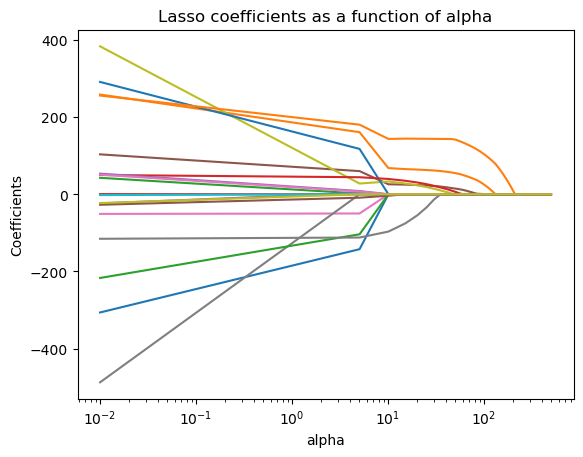

In [152]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of alpha');


**Observations:**

- Moving from left to right in the plot, observe that at first the lasso models contains many predictors with high magnitudes of coefficient estimates.
- With increasing `alpha`, the coefficient estimates approximate towards zero.

- Next, we use cross-validation to find the best value for  `alpha`. Lasso regression comes with built-in cross-validation.

In [155]:
# Create and fit the LassoCV model to the training data with cross-validation
# Lasso with 10 fold cross-validation and passing random values for alphas

lasso_cv_model = LassoCV(alphas = np.random.randint(0, 1000, 100), cv =10, max_iter=10000, n_jobs=-1).fit(X_train, y_train)

Let's check the best alpha value.

In [158]:
# Get the best alpha (regularization strength) selected by cross-validation 
# It will give different values as we have used a random list for alphas above

lasso_cv_model.alpha_

2

In [160]:
# Create and fit the LassoCV model to the training data with cross-validation
# Lasso with 10 fold cross-validation and passing a fixed list for alphas

lasso_cv_model = LassoCV(alphas = [0.001,0.005,0.05,0.5,0.1,1,10,15,20,25,30], cv =10, max_iter=10000, n_jobs=-1).fit(X_train, y_train)

In [162]:
# Get the best alpha (regularization strength) selected by cross-validation

lasso_cv_model.alpha_

1.0

Let's use the best alpha value, and see if you can tune it.

In [165]:
# Create and fit the Lasso regression model using the best alpha found by cross-validation

lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_, max_iter=10000).fit(X_train, y_train)

**Next Steps:** Model Evaluation on Lasso model with the best alpha

- Test the lasso model and make predictions
- Evaluate the RMSE and R2 scores for model performance.

In [168]:
# Training data
y_train_pred_tuned = lasso_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred_tuned)
print('MSE training set post tuning', round(mse_train, 2))
print('R squared training set post tuning', round(r2_score(y_train, y_train_pred_tuned)*100,2))

MSE training set post tuning 84531.03
R squared training set post tuning 47.15


In [170]:
# Test data
y_test_pred_tuned = lasso_tuned.predict(X_test)
mse_test =mean_squared_error(y_test, y_test_pred_tuned)
print('MSE test set post tuning', round(mse_test, 2))
print('R squared test set post tuning', round(r2_score(y_test, y_test_pred_tuned)*100,2))

MSE test set post tuning 116175.54
R squared test set post tuning 38.36


Now, let's find the coefficient of the tuned model.

In [173]:
# Create a Pandas Dataframe of the coefficients from the tuned Lasso regression model

pd.DataFrame(lasso_tuned.coef_, index=X_train.columns)

,0
AtBat,-310.805286
Hits,264.550748
HmRun,24.160851
Runs,0.000000
RBI,-0.000000
Walks,98.275017
Years,-71.929389
CAtBat,-154.880263
CHits,115.476423
CHmRun,0.000000


**Observations**
- __Zero Coefficients:__ Features like Runs, RBI, CAtBat, CHmRun, NewLeague_N, and several others have coefficients shrunk to zero. This indicates that Lasso has deemed these features less important or irrelevant for predicting the target variable in the presence of other features.

- __Non-Zero Coefficients:__ Features such as AtBat, Hits, Walks, CRuns, and CRBI have non-zero coefficients and are considered significant predictors in the model. The magnitude and sign of each coefficient indicate the strength and direction of the influence on the response variable:

- __Positive Coefficients__ (e.g., Hits at 224.372390 and CRuns at 200.690747) suggest that an increase in these variables is associated with an increase in the target variable.

- __Negative Coefficients__ (e.g., AtBat at -239.109204 and Years at -68.010940) suggest that an increase in these variables is associated with a decrease in the target variable

### __Ridge Regression__

__Ridge Regression__ also known as L2 Regularization is a regularization technique used in linear regression to prevent overfitting. It is useful for handling multicollinear data, where two predictors/independent variables are highly correlated to each other.

**_Collinearity_** refers to a situation where two or more predictor variables in a multiple regression model are highly correlated, meaning they have a linear relationship. This correlation makes it difficult to determine the individual effect of each predictor on the target variable, leading to unreliable and unstable estimates of regression coefficients.

Ridge regression adds a regularization term to the loss function that penalizes large coefficients in the model and encourages the model to have smaller coefficients.
It results in a simpler and more generalized model.

Ridge Regression does shrink the coefficients, it does not force them to zero, meaning it does not perform feature selection

__In Ridge regression__, the minimization objective (also called the standard loss function (mean squared error)) becomes:

$$ \text{Loss} = \sum_{i=1}^n \left( y_i - \left( \beta_0 + \sum_{j=1}^p \beta_j x_{ij} \right) \right)^2 + \alpha \sum_{j=1}^p \beta_j^2 $$

which equals:

$$ \text{Loss} = \text{RSS} + \alpha \sum_{j=1}^p \beta_j^2 $$

Where $ \alpha \ $ (alpha) can take various values:
- $ \alpha = 0 \ $: Same coefficients as least squares linear regression
- $ \alpha = \infty $: All coefficients are zero
- $ 0 < \alpha < \infty $: Coefficients are between 0 and that of least squares linear regression


### Let's see how to implement Ridge regression

In [178]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

**Next Steps:**

- Starting the implementation using the train test data acquired from the Lasso implementation on `Hitters.csv` dataset.
- Let's fit the model and check what the intercept value is.

In [181]:
# Create and fit the Ridge regression model to the training data

ridge_model = Ridge(alpha=1).fit(X_train, y_train)
ridge_model.intercept_

552.2287554333539

__Observation:__
- The intercept value for the Ridge model is 552.

**Next Steps:** Model evaluation on Ridge model

- Test the ridge model and make predictions
- Evaluate the RMSE and R2 scores for model performance.

In [185]:
# Training data
y_train_pred = ridge_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, y_train_pred)*100,2))

MSE training set 84369.79
R squared training set 47.25


In [187]:
# Test data
y_test_pred = ridge_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, y_test_pred)*100,2))

MSE test set 116730.89
R squared test set 38.06


**Next Steps**

- Let's check the coefficient of the model.
- Next, we use cross-validation to find the best value for  `alpha`. Ridge regression just like lasso, comes with built-in cross-validation.

In [190]:
# Get the coefficients (weights) of the fitted Ridge regression model
ridge_model.coef_

array([-299.44680072,  247.15463531,   26.09749437,    8.12950685,
         -4.59947678,   98.24018695,  -73.56921813, -208.11549116,
        220.72992894,   24.79168215,  231.91705884,  188.99248475,
       -212.18547418,   51.11247316,   46.6903119 ,  -27.64614616,
         43.01303452, -120.28167205,  -17.53721078])

In [192]:
ridge_cv_model = RidgeCV(alphas= np.random.randint(0, 1000, 100), cv=10).fit(X_train, y_train)

# Get the best alpha (regularization strength) selected by cross-validation
ridge_cv_model.alpha_

208

In [193]:
# Create and fit the ridge regression model using the best alpha found by cross-validation

ridge_tuned = Ridge(alpha=ridge_cv_model.alpha_, max_iter=10000).fit(X_train, y_train)

**Next Steps:** Model Evaluation on tuned Ridge model with the best alpha

- Test the ridge model and make predictions
- Evaluate the RMSE and R2 scores for model performance.

In [195]:
# Training data
y_train_pred_tuned = ridge_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred_tuned)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, y_train_pred_tuned)*100,2))

MSE training set 103151.35
R squared training set 35.51


In [196]:
# Test data
y_test_pred_tuned = ridge_tuned.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred_tuned)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, y_test_pred_tuned)*100,2))

MSE test set 117604.51
R squared test set 37.6


In [201]:
# Create a Pandas Dataframe of the coefficients from the tuned Ridge regression model

pd.DataFrame(ridge_tuned.coef_, index=X_train.columns)

,0
AtBat,4.871181
Hits,26.597294
HmRun,6.782015
Runs,18.075746
RBI,22.287803
Walks,21.610800
Years,4.722797
CAtBat,21.619143
CHits,32.322516
CHmRun,28.203593


**Observation**

- The coefficients with the highest values suggest that cumulative career statistics like total runs batted in, total hits, and total runs scored historically have the most significant positive influence on the target variable.

- Division_W: The only feature with a notably high negative coefficient is Division_W, which indicates that being in the Western division is associated with a negative effect on the target variable. This could reflect divisional performance differences or disparities in competitive levels.

- Years, Assists, and NewLeague_N: These features have smaller positive coefficients, suggesting a modest but positive influence on the model’s predictions. This indicates that experience and being in a new league might have a slight positive impact.

#### __This analysis helps in understanding the relative importance and influence of different aspects of a baseball player's statistics on the predicted target__

In [205]:
# Comparison of Lasso and Rigde coefficients 

lasso_series = pd.Series(lasso_tuned.coef_, index=X_train.columns)
lasso_series

AtBat         -310.805286
Hits           264.550748
HmRun           24.160851
Runs             0.000000
RBI             -0.000000
Walks           98.275017
Years          -71.929389
CAtBat        -154.880263
CHits          115.476423
CHmRun           0.000000
CRuns          274.324904
CRBI           222.999446
CWalks        -217.312944
PutOuts         50.427732
Assists         41.839507
Errors         -22.768896
League_N        23.875404
Division_W    -118.631076
NewLeague_N     -0.000000
dtype: float64

In [207]:
ridge_series = pd.Series(ridge_tuned.coef_, index=X_train.columns)
ridge_series

AtBat           4.871181
Hits           26.597294
HmRun           6.782015
Runs           18.075746
RBI            22.287803
Walks          21.610800
Years           4.722797
CAtBat         21.619143
CHits          32.322516
CHmRun         28.203593
CRuns          29.788044
CRBI           34.551399
CWalks          6.347992
PutOuts        28.484587
Assists         4.079147
Errors         -6.166437
League_N        8.677439
Division_W    -30.243530
NewLeague_N     4.269949
dtype: float64

In [209]:
lasso_ridge_comp_df = pd.DataFrame({'Lasso': lasso_series, 'Ridge': ridge_series})
lasso_ridge_comp_df

,Lasso,Ridge
AtBat,-310.805286,4.871181
Hits,264.550748,26.597294
HmRun,24.160851,6.782015
Runs,0.000000,18.075746
RBI,-0.000000,22.287803
Walks,98.275017,21.610800
Years,-71.929389,4.722797
CAtBat,-154.880263,21.619143
CHits,115.476423,32.322516
CHmRun,0.000000,28.203593


### __Elastic Net Regression__

Elastic Net regression is a regularization technique that linearly combines the penalties of Lasso (L1) and Ridge (L2) methods. It is particularly useful when dealing with highly collinear data, where ordinary least squares might not perform well.

**_Ordinary Least Squares (OLS)_** is a method for estimating the parameters in a linear regression model. OLS aims to find the line (or hyperplane in higher dimensions) that minimizes the sum of the squared differences (residuals) between the observed values and the values predicted by the linear model. While OLS works well under many circumstances, it can become problematic when predictor variables are highly collinear making the model unstable and less interpretable.

The Elastic Net method is defined as minimizing the following loss function:

$$
\text{Loss} = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2
$$


Where:
- $\frac{1}{2n} \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2$ is the residual sum of squares.
- $\lambda_1 \sum_{j=1}^{p} |\beta_j|$ is the L1 penalty (Lasso).
- $\lambda_2 \sum_{j=1}^{p} \beta_j^2$ is the L2 penalty (Ridge).

- $\lambda_1$ and $\lambda_2$ are regularization parameters that control the balance between fitting the model well to the data and keeping the model parameters small to avoid overfitting.

### Let's see how to implement Elastic net regression

In [214]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

**Next Steps:**

- Starting the implementation using the train test data acquired from the Lasso implementation on `Hitters.csv` dataset.
- Let's fit the model and check what the intercept value is.

In [217]:
# Initializing and fitting the ElasticNet model

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha is the regularization parameter
elastic_net.fit(X_train, y_train)
elastic_net.intercept_

518.1732769716566

__Observation:__
- The intercept value for the ElasticNet model is 518.

**Next Steps:** Model evaluation on Elastic Net model

- Test the model and make predictions
- Evaluate the RMSE and R2 scores for model performance.

In [221]:
# Training data
y_train_pred = elastic_net.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, y_train_pred)*100,2))
print("Root mean Squared Error(RMSE): ", np.sqrt(mean_squared_error(y_train, y_train_pred)))

MSE training set 100811.47
R squared training set 36.97
Root mean Squared Error(RMSE):  317.5082184951675


In [223]:
# Test data
y_test_pred = elastic_net.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, y_test_pred)*100,2))
print("Root mean Squared Error(RMSE): ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

MSE test set 115482.94
R squared test set 38.72
Root mean Squared Error(RMSE):  339.827814119469


__Observation:__
- The MSE value is 115482.
- Root mean Squared Error(RMSE):  339.827814119469
- The r2 score is 0.38.

**Next Steps**

- Let's check the coefficient of the model.

In [227]:
# Get the coefficients (weights) of the fitted Ridge regression model
elastic_net.coef_

array([ -2.32444269,  32.30474803,   2.9866463 ,  19.29717715,
        24.37757748,  24.03646085,  -1.75094796,  21.18106091,
        38.83116968,  31.91940944,  34.58738415,  41.51340678,
        -1.10580746,  34.27606622,   5.57111951,  -9.40358356,
        11.97939869, -44.3230192 ,   4.71404392])

__In Elastic Net regression__,

- `alpha` controls the overall strength of regularization, with higher values leading to more shrinkage of the coefficients to reduce overfitting.  It's better to use a log scale or more systematic approach to ensure that the alphas tested cover a suitable range, especially since very small or very large values might not be appropriate:

- `l1_ratio` determines the mix of L1 (Lasso) and L2 (Ridge) regularization, ranging from 0 (pure Ridge) to 1 (pure Lasso). Intermediate values blend the two, leveraging Lasso's sparsity and Ridge's ability to handle multicollinearity. Ensure l1_ratio ranges from a small positive number to 1 (but not including 0 if you wish to avoid pure Ridge regression). This parameter is the mix ratio that controls the combination of L1 and L2 regularization

Tuning these parameters allows Elastic Net to balance model performance and interpretability effectively.



In [230]:
# Define the parameter grid for alpha and l1_ratio
alphas = np.logspace(-2, 2, 100)

# start from 0.01 to include L1 regularization
l1_ratios = np.linspace(0.01, 1, 100)

In [232]:
# Create and fit the Elastic Net CV model, using 10-fold cross-validation
elastic_cv_model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10, max_iter=10000).fit(X_train, y_train)

In [233]:
best_alpha = elastic_cv_model.alpha_
best_l1_ratio = elastic_cv_model.l1_ratio_

# Print the best alpha and l1_ratio found
print('Best alpha:', best_alpha)
print('Best l1_ratio:', best_l1_ratio)

Best alpha: 0.01747528400007684
Best l1_ratio: 0.060000000000000005


In [234]:
# Create and fit the Elastic Net regression model using the best alpha and l1_ratio found by cross-validation

elastic_tuned = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000).fit(X_train, y_train)

**Next Steps:** Model Evaluation on tuned Elastic Net model with the best alpha and l1_ratio

- Test the Elastic Net model and make predictions
- Evaluate the RMSE and R2 scores for model performance.

In [236]:
# Training data
y_train_pred_tuned = elastic_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred_tuned)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, y_train_pred_tuned)*100,2))
print("Root mean Squared Error(RMSE): ", np.sqrt(mean_squared_error(y_train, y_train_pred_tuned)))

MSE training set 86118.71
R squared training set 46.16
Root mean Squared Error(RMSE):  293.45989711275564


In [237]:
# Test data
y_test_pred_tuned = elastic_tuned.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred_tuned)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, y_test_pred_tuned)*100,2))
print("Root mean Squared Error(RMSE): ", np.sqrt(mean_squared_error(y_test, y_test_pred_tuned)))

MSE test set 114403.03
R squared test set 39.3
Root mean Squared Error(RMSE):  338.23516319436953


In [238]:
# Print R-squared scores for the training and test sets
# Another way to get the R-squared scores

print('R squared training set:', round(elastic_tuned.score(X_train, y_train) * 100, 2))
print('R squared test set:', round(elastic_tuned.score(X_test, y_test) * 100, 2))

R squared training set: 46.16
R squared test set: 39.3


In [239]:
# Create a Pandas Dataframe of the coefficients from the tuned Elastic Net regression model
coefficients = pd.DataFrame(elastic_tuned.coef_, index=X_train.columns)
coefficients

,0
AtBat,-227.585549
Hits,178.391331
HmRun,6.397823
Runs,24.394902
RBI,16.613592
Walks,78.937465
Years,-78.409075
CAtBat,-62.728112
CHits,158.845697
CHmRun,42.906875


## __Model Optimization__

### __Hyperparameter tuning__

- Hyperparameter tuning is the process of finding the best settings for the parameters in a machine-learning model.
- Hyperparameters are settings that are not learned during training but are set before the training process begins.
- Hyperparameter tuning involves trying different combinations of hyperparameters and evaluating the model's performance using validation techniques.

Some common techniques for Hyperparameter tuning are:

1. **Grid Search**: It systematically works through multiple combinations of hyperparameters. It performs an exhaustive search on a specified parameter grid.


  * **How it works:**
    * Define a Parameter Grid: Specify a set of hyperparameters and their possible values.
    * Combination Evaluation: The algorithm evaluates all possible combinations of these hyperparameters.
    * Model Training: For each combination, the model is trained and evaluated using cross-validation.
    * Optimal Parameters: The combination yielding the best performance (e.g., highest accuracy) is chosen as the optimal set.

2. **Random Search:** It explores hyperparameter space by sampling a fixed number of parameter settings from the specified distributions.

* **How it works:**
  * Define Parameter Distributions: Specify distributions or ranges for the hyperparameters.
  * Random Sampling: Randomly sample combinations of hyperparameters from these distributions.
  * Model Training: For each sampled combination, the model is trained and evaluated using cross-validation.
  * Optimal Parameters: The combination yielding the best performance is chosen as the optimal set.

### Implementation of Gridsearch Cross validation technique:

In [243]:
X_train[:5]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
168,-0.397522,-0.564851,-0.670974,-1.052955,-0.393382,-1.060741,-0.684910,-0.924502,-0.910332,-0.729716,-0.936501,-0.847742,-0.856822,-0.210356,-0.654364,-0.777869,0,1,0
148,0.780435,0.791703,-0.437296,0.306138,-0.355490,-0.584603,0.768478,0.560523,0.571824,-0.332183,0.302385,0.145025,-0.052093,0.071044,1.831723,0.315685,0,0,0
221,1.291745,1.459214,-0.320458,1.509906,0.061319,0.891425,-0.684910,-0.763020,-0.718487,-0.577718,-0.653843,-0.733311,-0.664141,0.147789,-0.676829,0.003241,1,0,1
227,1.265856,1.136225,0.847928,2.131206,0.061319,1.272336,-1.100164,-0.695302,-0.692186,-0.378952,-0.545591,-0.708569,-0.581023,0.147789,-0.669341,-0.777869,0,1,0
139,0.398569,0.081127,-1.021489,0.577957,-0.582840,1.558019,-1.100164,-0.928843,-0.918067,-0.776484,-0.849298,-0.891040,-0.694365,-0.031284,-0.714270,0.159463,0,1,1


In [244]:
y_train[:5]

168    110.0
148    850.0
221    210.0
227    200.0
139    100.0
Name: Salary, dtype: float64

In [245]:
# Import the necessary classes from scikit-learn
from sklearn.model_selection import GridSearchCV

In [246]:
# Create a repeated K-fold cross-validator
cv = RepeatedKFold(n_splits = 10, n_repeats = 2, random_state = 1)

# Define the grid of hyperparameters to search
grid = dict()
# grid['alpha'] = np.arange(0,1,0.01)
grid['alpha'] = np.arange(0,1,0.1)
grid


{'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}

In [280]:
# Create an instance of the Ridge regression model
model = Ridge()

In [282]:
# Create the GridSearchCV object

search = GridSearchCV(model, grid, scoring = 'neg_mean_absolute_error',cv = cv, n_jobs= -1)

In [284]:
# Fit the GridSearchCV object to the training data

results = search.fit(X_train, y_train)

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -238.403
Config: {'alpha': 0.9}


In [286]:
df1 = pd.DataFrame(search.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005906,0.004505,0.001777,0.000957,0.0,{'alpha': 0.0},-182.714448,-218.161724,-251.155563,-230.926764,...,-255.003649,-298.910271,-254.086838,-217.252520,-219.584616,-255.797604,-188.255095,-241.979325,32.805775,10
1,0.002050,0.000827,0.001103,0.000562,0.1,{'alpha': 0.1},-181.299242,-218.693883,-252.390835,-228.137010,...,-254.308744,-295.176099,-254.122159,-216.088780,-218.179958,-251.525771,-189.213520,-240.765787,32.557194,9
2,0.001263,0.000538,0.000614,0.000203,0.2,{'alpha': 0.2},-179.968832,-219.003483,-253.410569,-226.316967,...,-253.698592,-292.889203,-254.384625,-215.041856,-216.920291,-249.364984,-190.106914,-239.994086,32.496758,8
3,0.001508,0.000898,0.000651,0.000206,0.3,{'alpha': 0.30000000000000004},-178.727462,-219.182664,-254.286219,-224.997379,...,-253.290245,-291.289668,-254.728363,-214.101980,-215.773984,-248.783236,-190.850140,-239.553874,32.644774,7
4,0.001668,0.000965,0.000708,0.000302,0.4,{'alpha': 0.4},-177.567631,-219.277299,-255.056581,-223.975230,...,-253.129842,-290.076623,-255.098234,-213.253950,-214.718384,-249.008408,-191.482868,-239.261682,32.804942,6
5,0.001681,0.000830,0.000869,0.000431,0.5,{'alpha': 0.5},-176.480082,-219.313885,-255.745781,-223.147072,...,-253.003866,-289.105359,-255.470606,-212.483787,-213.994359,-249.226126,-192.031221,-239.028728,32.962523,5
6,0.002093,0.000996,0.001109,0.000574,0.6,{'alpha': 0.6000000000000001},-175.456234,-219.309157,-256.370088,-222.454020,...,-252.907940,-288.296879,-255.834696,-211.779812,-213.348537,-249.429219,-192.513345,-238.833902,33.125894,4
7,0.001827,0.001067,0.000978,0.000554,0.7,{'alpha': 0.7000000000000001},-174.488680,-219.274328,-256.941083,-221.859760,...,-252.837582,-287.604038,-256.185549,-211.132512,-212.718357,-249.616187,-192.942323,-238.659917,33.288611,3
8,0.001388,0.000740,0.000771,0.000341,0.8,{'alpha': 0.8},-173.571161,-219.217224,-257.520301,-221.638873,...,-252.788762,-286.996775,-256.521036,-210.534153,-212.103434,-249.787660,-193.327871,-238.522483,33.440259,2
9,0.001422,0.000239,0.000702,0.000207,0.9,{'alpha': 0.9},-172.698404,-219.143477,-258.137402,-221.452446,...,-252.758025,-286.454926,-256.840462,-209.978424,-211.503341,-249.945014,-193.677375,-238.403154,33.589010,1


__Observation:__

- As you can see from the output, the Mean Absolute Error, and the configuration fusion alpha is **0.9**.

**Next Steps:** Model Evaluation with the best alpha obtained above.

- Let's try this with alpha points and predict it.

In [252]:
# Fetch the value from the key value pair in the dictionary, results
results.best_params_.get('alpha')

0.9

In [253]:
# Create and fit the Ridge regression model to the training data with the optimal alpha

ridge_model_after_gridcv = Ridge(alpha = results.best_params_.get('alpha')).fit(X_train, y_train)

y_test_pred_after_gridcv = ridge_model_after_gridcv.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_after_gridcv))
rmse_test

341.8763639660759

In [254]:
# Get the r2 score
r2_score_test = r2_score(y_test,y_test_pred_after_gridcv)
r2_score_test

0.3798224478702297

__Observation:__
- The r2 score is 0.38. It suggests a moderate fit. The model captures some of the variability in the data but not a large portion.

- Let's check the coefficient of the ridge regression.

In [257]:
# Create a Pandas Dataframe of the coefficients from the fitted Ridge regression model
pd.DataFrame(ridge_model_after_gridcv.coef_, index = X_train.columns)

,0
AtBat,-301.940590
Hits,250.000657
HmRun,27.368934
Runs,7.101426
RBI,-6.000930
Walks,99.030120
Years,-72.603088
CAtBat,-221.067417
CHits,225.900021
CHmRun,22.855480


__Observation:__

- Penalization has occurred, as you can see in the negative values.

### Implementation of RandomSearch Cross validation technique:

In [320]:
# Import the necessary classes from scikit-learn
from sklearn.model_selection import RandomizedSearchCV

In [352]:
# Create a repeated K-fold cross-validator
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# Define the random search hyperparameters
param_distributions = {
    'alpha': np.arange(0,1,0.1)
}

In [396]:
# Create the RandomizedSearchCV object
# passing the seed as random_state will not produce random results

random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions = param_distributions,
                                   n_iter = 5,
                                   cv = cv,
                                   scoring = 'neg_mean_absolute_error')

In [398]:
# Fit the RandomizedSearchCV object to the training data

results = random_search.fit(X_train, y_train)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -238.426
Config: {'alpha': 0.8}


In [399]:
df2 = pd.DataFrame(random_search.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001299,0.000619,0.000676,0.000270,0.0,{'alpha': 0.0},-182.714448,-218.161724,-251.155563,-230.926764,...,-221.723998,-202.998494,-308.910929,-277.843192,-252.862523,-294.906327,-207.186270,-241.783576,34.705256,5
1,0.000883,0.000187,0.000495,0.000078,0.5,{'alpha': 0.5},-176.480082,-219.313885,-255.745781,-223.147072,...,-215.613016,-204.231750,-300.419578,-276.533853,-256.271364,-295.146438,-207.881111,-238.981276,34.542480,3
2,0.000729,0.000009,0.000453,0.000005,0.7,{'alpha': 0.7000000000000001},-174.488680,-219.274328,-256.941083,-221.859760,...,-213.997349,-204.304365,-299.216296,-275.718967,-256.949528,-294.932580,-208.103445,-238.583738,34.707775,2
3,0.000762,0.000085,0.000468,0.000033,0.8,{'alpha': 0.8},-173.571161,-219.217224,-257.520301,-221.638873,...,-213.269156,-204.302923,-298.717939,-275.285158,-257.223488,-294.806702,-208.203601,-238.425905,34.783528,1
4,0.002284,0.003609,0.001517,0.003945,0.3,{'alpha': 0.30000000000000004},-178.727462,-219.182664,-254.286219,-224.997379,...,-217.537756,-203.991159,-302.024103,-277.226459,-255.329478,-295.271305,-207.619690,-239.525384,34.380930,4


In [402]:
# Fetch the value from the key value pair in the dictionary, results
results.best_params_.get('alpha')

0.8

In [404]:
# Create and fit the Ridge regression model to the training data with the optimal alpha

ridge_model_after_randomcv = Ridge(alpha = results.best_params_.get('alpha')).fit(X_train, y_train)

y_test_pred_after_randomcv = ridge_model_after_randomcv.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_after_randomcv))
rmse_test

342.1111164515264

In [406]:
# Get the r2 score
r2_score_test = r2_score(y_test,y_test_pred_after_gridcv)
r2_score_test

0.3798224478702297